In [7]:
from category_class import Category
from product_class import Product

import numpy as np
from scipy import stats
import datetime
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from workalendar.usa import UnitedStates
from operator import itemgetter
import pandas as pd
from math import pi

def plot_time_price(data):
    colors = ['b', 'y', 'g', 'r']
    fig, axes = plt.subplots(figsize=(17, 14), nrows=2, ncols=2)
    fig.subplots_adjust(wspace=0.2, hspace=0.20, top=0.85, bottom=0.05)
    locator = mdates.MonthLocator(interval=3)
    formatter = mdates.DateFormatter('%b')
    
    cal=UnitedStates()
    #Goal: add annotations to the following four holidays: ['New year', 'Independence Day', 'Thanksgiving Day', 'Christmas Day']
    ann_labels = ['New year', 'Independence Day', 'Thanksgiving Day', 'Christmas Day']
    top_hols_dates = [hol[0] for hol in cal.holidays(data.index[0].year) if hol[1] in ann_labels] #Holidays as date_time objects
    
    xy_loc = [(0,-70), (0,100), (-100,-70), (-50,80)]
    
    for ax, data_item, color in zip(axes.flat, data.items(), colors):
        title = data_item[0]
        d = data_item[1]
        
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        
        ax.plot(d.index, d.values, color = color)
        ax.plot(d.index, np.zeros(len(d.index)), color='grey')
        ax.set_title(title,weight='bold', size=20, position=(0.5, 1.03), color = color,  
                     horizontalalignment='center', verticalalignment='center')
        
        ax.set_yticks(np.arange(-0.5,0.6,0.2))
    
        for hol, hol_date, xy_loc_2 in zip(ann_labels, top_hols_dates, xy_loc):
            if title == 'Office Products':
                ax.annotate(hol,
                    xy=(hol_date, d.loc[hol_date]), xycoords='data',
                    xytext=xy_loc_2, textcoords='offset points',
                    size=20,
                    arrowprops=dict(arrowstyle="->"))
                      
            else:
                ax.annotate('',
                    xy=(hol_date, d.loc[hol_date]), xycoords='data',
                    xytext=(-50, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
    plt.savefig('line_plot_time_price.jpg')
    plt.show()

def plot_radar(data):
    
    min_label = data.min().min() - 0.1
    max_label = data.max().max() + 0.1
    
    N = data.count(0)[0]
    theta = [n / float(N) * 2 * pi for n in range(N)]; theta += theta[:1]
    
    fig, axes = plt.subplots(figsize=(15,15), nrows=2, ncols=2,
                             subplot_kw=dict(polar=True))
    fig.subplots_adjust(wspace=0.33, hspace=0, top=1, bottom=0)

    colors = ['b', 'y', 'g', 'r']
    # Plot the four cases from the example data on separate axes
    for ax, hol, color in zip(axes.flat, data.items(), colors):
        title = hol[0]
        d = list(hol[1].values); d+= d[:1]

        ax.set_rgrids([-0.2, -0.6, 0, 0.4])
#         ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1), 
#                      horizontalalignment='center', verticalalignment='center')
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)

        ax.set_xticks(theta)
        ax.set_xticklabels(data.index, {'color': 'black', 'size': 12})#TODO: Replace with smaller text
        
        ax.set_yticks([min_label, 0, max_label])#assuming max_label is greater than 0
        ax.set_yticklabels(['%.1f' % min_label,"0", '%.1f' % max_label], {'color': 'grey', 'size': 9})
        ax.set_ylim(min_label, max_label)
        ax.legend([title], loc = (-0.15, -0.1))

#     fig.text(0.5, 0.965, 'Average Standardized Prices across Four Product Categories',
#              horizontalalignment='center', color='black', weight='bold',
#              size=20)
    
    plt.savefig('radar_plot_hol_price.jpg')
    plt.show()

def plot_holiday(cat1, cat2, cat3, cat4):
	_, hol_1 = cat1.holiday_correlation(2018, False)
	_, hol_2 = cat2.holiday_correlation(2018, False)
	_, hol_3 = cat3.holiday_correlation(2018, False)
	_, hol_4 = cat4.holiday_correlation(2018, False)

	frame = {'Office Products': hol_1, 'Software': hol_2, 'Electronics': hol_3, 'Toys': hol_4}
	hol_df = pd.DataFrame(frame)
	plot_radar(data = hol_df)

def time_price(cat1, cat2, cat3, cat4):
    time_price_1 = cat1.time_price(2018, False)
    time_price_2 = cat2.time_price(2018, False)
    time_price_3 = cat3.time_price(2018, False)
    time_price_4 = cat4.time_price(2018, False)

    frame = {'Office Products': time_price_1, 'Software': time_price_2, 'Electronics': time_price_3, 'Toys': time_price_4}
    time_price_df = pd.DataFrame(frame)
    plot_time_price(data = time_price_df)

def plot_average_derivative_prices(data):
    colors = ['b', 'y', 'g', 'r']
    fig, axes = plt.subplots(figsize=(17, 14), nrows=2, ncols=2)
    fig.subplots_adjust(wspace=0.2, hspace=0.20, top=0.85, bottom=0.05)
    locator = mdates.MonthLocator(interval=3)
    formatter = mdates.DateFormatter('%b')
    
    for ax, data_item, color in zip(axes.flat, data.items(), colors):
        title = data_item[0]
        d = data_item[1]
        
        ax.fill_between(d.index[1:], d.values[1:], 0, where=d.values[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
        ax.fill_between(d.index[1:], d.values[1:], 0, where=d.values[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)
        
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        
        ax.set_title(title,weight='bold', size=20, position=(0.5, 1.03), color = color,  
                     horizontalalignment='center', verticalalignment='center')
    plt.savefig('average_derivative_prices.jpg')
    plt.show()
    
def average_derivative_prices(cat1, cat2, cat3, cat4):
    adp1 = cat1.average_derivative_prices(2018, False)
    adp2 = cat2.average_derivative_prices(2018, False)
    adp3 = cat3.average_derivative_prices(2018, False)
    adp4 = cat4.average_derivative_prices(2018, False)
    
    frame = {'Office Products': adp1, 'Software': adp2, 'Electronics': adp3, 'Toys': adp4}
    adp_df = pd.DataFrame(frame)
    plot_average_derivative_prices(data = adp_df)
    
    
def plot_christmas_history(data):
    colors = ['b', 'y', 'g', 'r']
    fig, axes = plt.subplots(figsize=(17, 14), nrows=2, ncols=2)
    fig.subplots_adjust(wspace=0.2, hspace=0.20, top=0.85, bottom=0.05)
    
    for ax, data_item, color in zip(axes.flat, data.items(), colors):
        title = data_item[0]
        d = data_item[1]
        
        ax.plot(d.index, d.values, color = color)
        
        ax.set_title(title,weight='bold', size=20, position=(0.5, 1.03), color = color,  
                     horizontalalignment='center', verticalalignment='center')
    plt.savefig('average_price_christmas.jpg')
    plt.show()
    
def christmas_history_price(cat1, cat2, cat3, cat4):
    apc1 = cat1.average_price_christmas()
    apc2 = cat2.average_price_christmas()
    apc3 = cat3.average_price_christmas()
    apc4 = cat4.average_price_christmas()
    
    frame = {'Office Products': apc1, 'Software': apc2, 'Electronics': apc3, 'Toys': apc4}
    apc_df = pd.DataFrame(frame)
    plot_christmas_history(data = apc_df)
    
def plot_average_price_per_month(data):
    colors = ['b', 'y', 'g', 'r']
    fig, axes = plt.subplots(figsize=(17, 14), nrows=2, ncols=2)
    fig.subplots_adjust(wspace=0.2, hspace=0.20, top=0.85, bottom=0.05)
    
    for ax, data_item, color in zip(axes.flat, data.items(), colors):
        title = data_item[0]
        d = data_item[1]
        
        ax.plot(d.index, d.values, color = color)
        
        ax.set_title(title,weight='bold', size=20, position=(0.5, 1.03), color = color,  
                     horizontalalignment='center', verticalalignment='center')
    plt.savefig('average_price_per_month.jpg')
    plt.show()
    
def average_price_per_month_price(cat1, cat2, cat3, cat4):
    appm1 = cat1.average_price_per_month()
    appm2 = cat2.average_price_per_month()
    appm3 = cat3.average_price_per_month()
    appm4 = cat4.average_price_per_month()
    
    frame = {'Office Products': appm1, 'Software': appm2, 'Electronics': appm3, 'Toys': appm4}
    appm_df = pd.DataFrame(frame)
    plot_average_price_per_month(data = appm_df)
        

In [2]:
products1 = list(np.load('office_products_sorted_ph.npy', allow_pickle=True))
products2 = list(np.load('product_software_sorted_ph.npy', allow_pickle=True))
products3 = list(np.load('product_electronics_sorted_ph.npy', allow_pickle=True))
products4 = list(np.load('toy_products_sorted_ph.npy', allow_pickle=True))

products1 = [Product(i) for i in products1]
products2 = [Product(i) for i in products2]
products3 = [Product(i) for i in products3]
products4 = [Product(i) for i in products4]

cat1 = Category(products1)
cat2 = Category(products2)
cat3 = Category(products3)
cat4 = Category(products4)

#     plot_holiday(cat1, cat2, cat3, cat4)
#     time_price(cat1, cat2, cat3, cat4)


/Users/changzhou/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Year 2018
Product Data not available for Year 2018
Rating and Review data not a

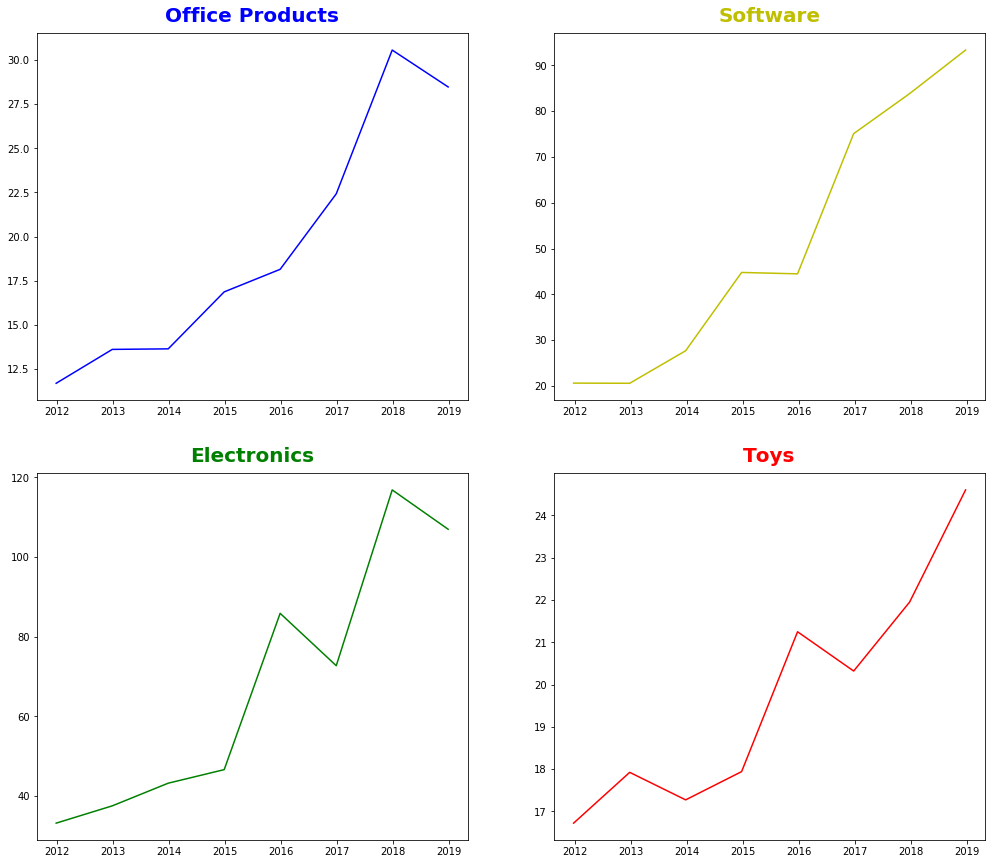

In [9]:
christmas_history_price(cat1, cat2, cat3, cat4)

In [17]:
a.groupby(a.index.month).mean()
# a.index?

amazon_time
1     31.146946
2     30.521324
3     30.371655
4     29.973431
5     29.814563
6     29.860238
7     29.914191
8     29.240787
9     29.017611
10    29.425799
11    28.606953
12    28.582776
dtype: float64

In [11]:
# t = christmas_history_price(cat1, cat2, cat3, cat4)

In [12]:
t

,Office Products,Software,Electronics,Toys
amazon_time,,,,
2011-12-25,11.688937,20.618000,33.238000,16.723333
2012-12-25,13.608258,20.580526,37.576054,17.924280
2013-12-25,13.638973,27.684400,43.264120,17.273159
2014-12-25,16.865227,44.774714,46.661481,17.941573
2015-12-25,18.142979,44.470606,85.877605,21.247715
2016-12-25,22.419038,75.077787,72.739777,20.319090
2017-12-25,30.560997,83.814802,116.841920,21.950110
2018-12-25,28.471850,93.320919,106.969019,24.601067


DatetimeIndex(['2011-12-25', '2012-12-25', '2013-12-25', '2014-12-25',
               '2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25'],
              dtype='datetime64[ns]', name='amazon_time', freq=None) [11.68893678 13.60825758 13.6389726  16.86522654 18.14297852 22.41903822
 30.56099653 28.47184982]
DatetimeIndex(['2011-12-25', '2012-12-25', '2013-12-25', '2014-12-25',
               '2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25'],
              dtype='datetime64[ns]', name='amazon_time', freq=None) [20.618      20.58052632 27.6844     44.77471429 44.47060606 75.07778736
 83.81480247 93.32091881]
DatetimeIndex(['2011-12-25', '2012-12-25', '2013-12-25', '2014-12-25',
               '2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25'],
              dtype='datetime64[ns]', name='amazon_time', freq=None) [ 33.238       37.57605442  43.26412037  46.66148148  85.87760539
  72.73977723 116.84192027 106.96901898]
DatetimeIndex(['2011-12-25', '2012-12-25', '2013-12-25', '2

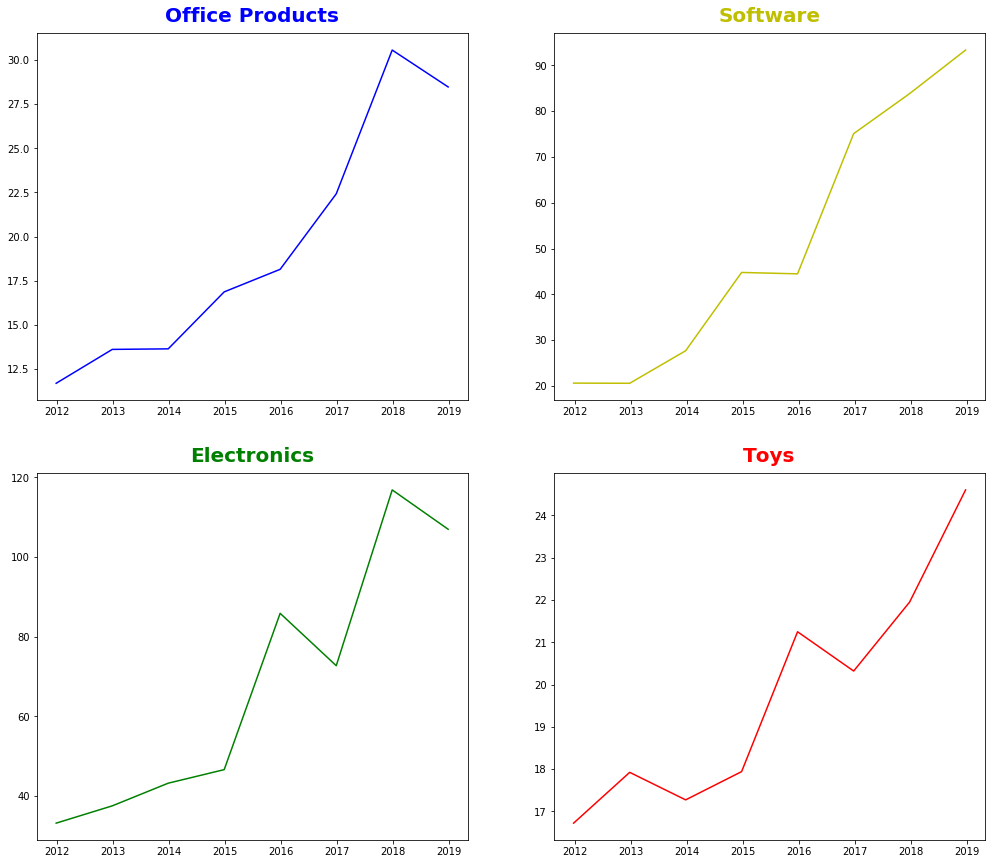

In [17]:
colors = ['b', 'y', 'g', 'r']
fig, axes = plt.subplots(figsize=(17, 14), nrows=2, ncols=2)
fig.subplots_adjust(wspace=0.2, hspace=0.20, top=0.85, bottom=0.05)

for ax, data_item, color in zip(axes.flat, t.items(), colors):
    title = data_item[0]
    d = data_item[1]

    print(d.index, d.values)
    ax.plot(d.index, d.values, color = color)

    ax.set_title(title,weight='bold', size=20, position=(0.5, 1.03), color = color,  
                 horizontalalignment='center', verticalalignment='center')
plt.savefig('average_price_christmas.jpg')
plt.show()

In [8]:
time_price_1 = cat1.time_price(2018, False)

In [9]:
time_price_1

amazon_time
2018-01-01   -0.046757
2018-01-02   -0.088241
2018-01-03   -0.080044
2018-01-04   -0.032997
2018-01-05    0.000158
                ...   
2018-12-27   -0.161835
2018-12-28   -0.143842
2018-12-29   -0.151963
2018-12-30   -0.138630
2018-12-31   -0.150698
Length: 365, dtype: float64

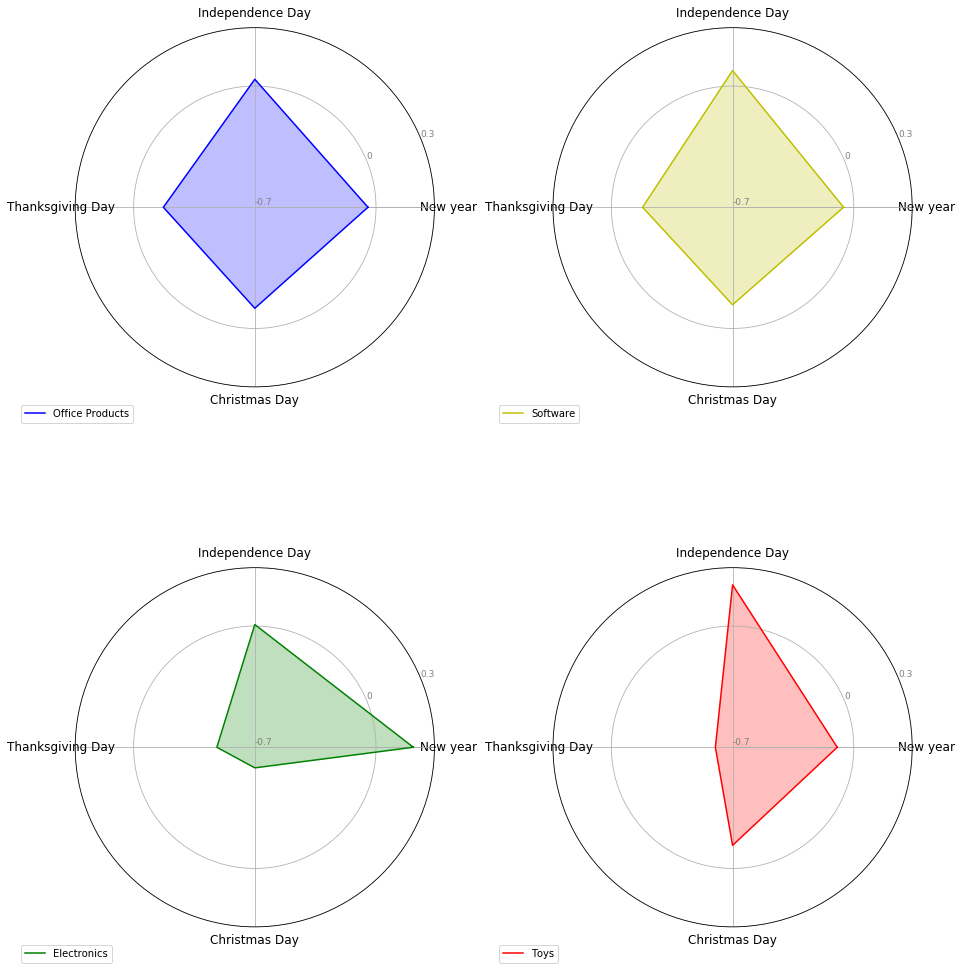

In [4]:
plot_holiday(cat1, cat2, cat3, cat4)

/Users/changzhou/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


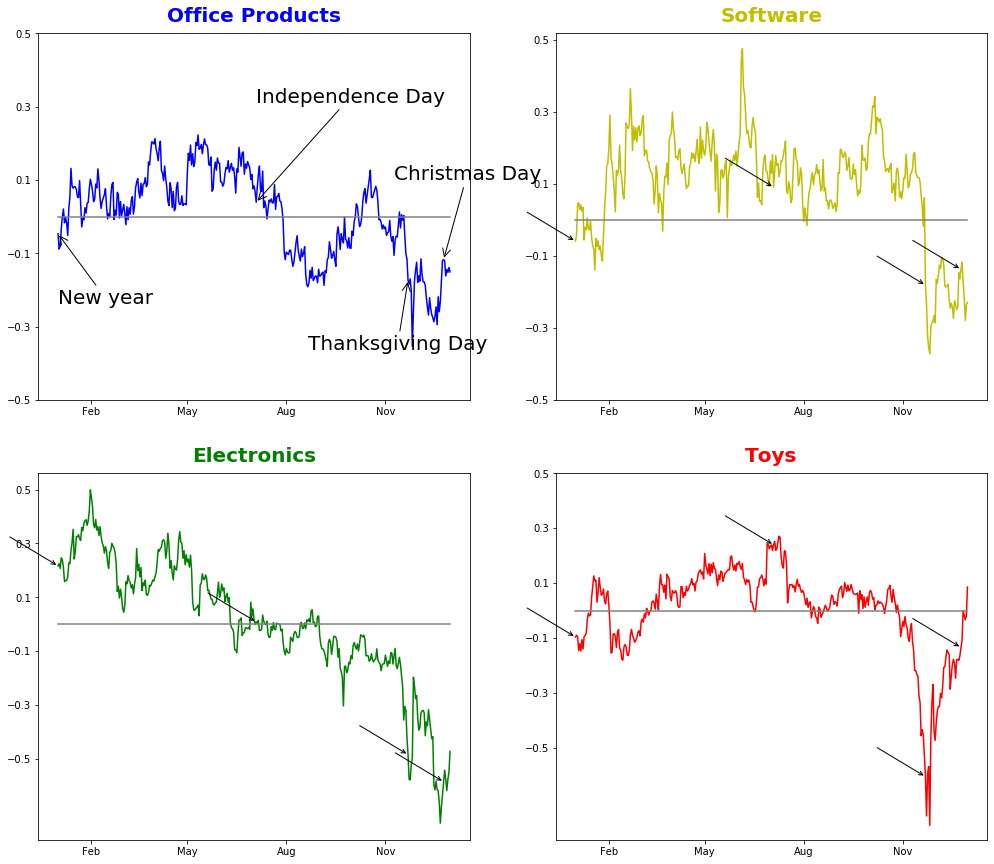

In [5]:
time_price(cat1, cat2, cat3, cat4)

/Users/changzhou/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


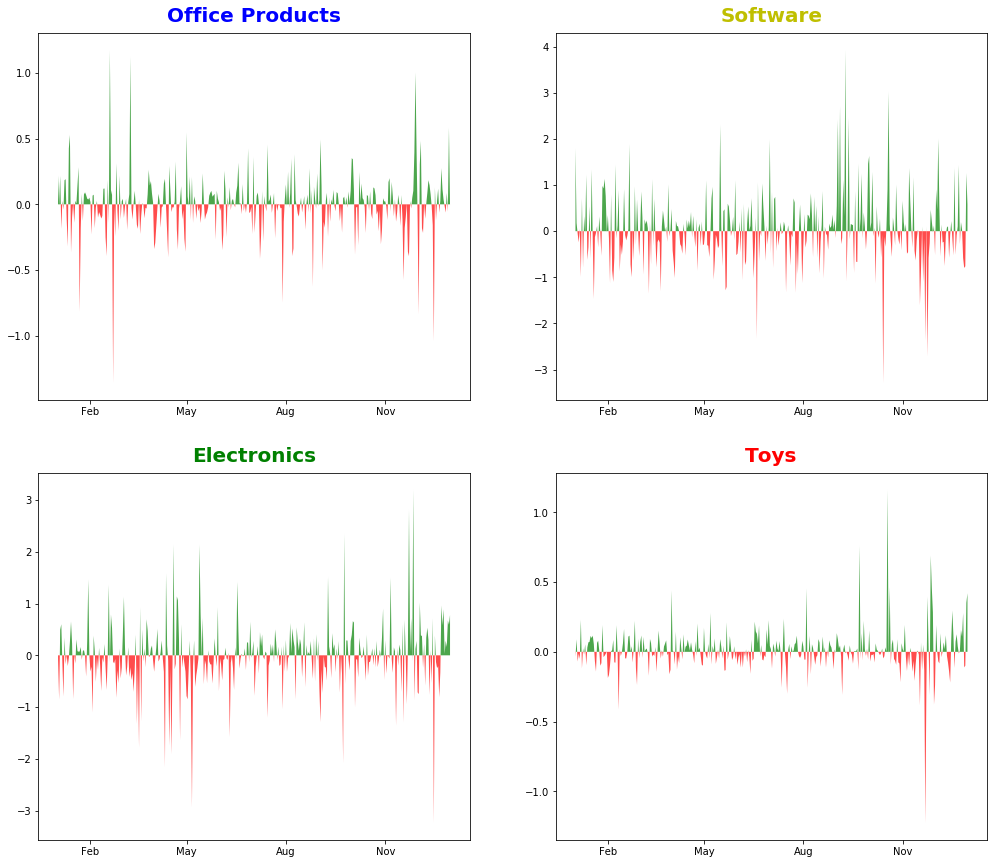

In [3]:
average_derivative_prices(cat1, cat2, cat3, cat4)

In [18]:
products = list(np.load('product_software_sorted_ph.npy', allow_pickle=True))
products = [Product(i) for i in products]
cat = Category(products)
# print(len(cat.product_list))
# cat.holiday_correlation(2018, False)
b = cat.price_variation()
print(b)

Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Year 2018
Product Data not available for Year 2018
Rating and Review data not available
Product Data not available for Y

In [19]:
cat.product_list[0].df

,amazon_time,amazon_price,normalized,standardized,derivative
0,2014-07-22,199.99,1.000000,0.913399,0.0
1,2014-07-23,199.99,1.000000,0.913399,0.0
2,2014-07-24,199.99,1.000000,0.913399,0.0
3,2014-07-25,199.99,1.000000,0.913399,0.0
4,2014-07-26,199.99,1.000000,0.913399,0.0
...,...,...,...,...,...
1954,2019-11-27,69.00,0.102747,0.726209,0.0
1955,2019-11-28,69.00,0.102747,0.726209,0.0
1956,2019-11-29,69.00,0.102747,0.726209,0.0
1957,2019-11-30,69.00,0.102747,0.726209,0.0


In [3]:
cat1.average_derivative_prices()

amazon_time
2018-01-01    0.000000
2018-01-02    0.218403
2018-01-03   -0.001973
2018-01-04    0.216270
2018-01-05   -0.186391
                ...   
2018-12-27   -0.062650
2018-12-28    0.086558
2018-12-29   -0.055857
2018-12-30    0.583145
2018-12-31   -0.014655
Length: 365, dtype: float64

In [4]:
import numpy as np
import pandas as pd

# Prepare Data
df = products[0].df
x = np.arange(df.shape[0])
y_returns = b[0]

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Decorations
# xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.amazon_time.dt.year, df.amazon_time.dt.month_name(), df.amazon_time.dt)]
xtickvals = list(df.amazon_time.dt.strftime("%m/%d/%Y, %H:%M:%S"))
# plt.gca().set_xticks(x[::6])
# plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
# plt.ylim(-35,35)
# plt.xlim(1,100)
plt.ylabel('Standardized Price Variation')
plt.grid(alpha=0.5)
plt.show()

NameError: name 'products' is not defined

In [10]:
df

,amazon_time,amazon_price,normalized,standardized,derivative
0,2015-06-10 06:00:00,207.53,1.000000,2.204547,0.000
2,2015-06-10 11:50:00,207.53,1.000000,2.204547,-1.280
3,2015-06-10 14:02:00,204.97,0.977323,2.067378,-0.980
4,2015-06-10 23:48:00,205.57,0.982638,2.099527,0.250
5,2015-06-11 03:30:00,205.47,0.981752,2.094169,-0.090
...,...,...,...,...,...
10309,2019-11-21 06:20:00,131.50,0.326513,-1.869253,7.995
10310,2019-11-21 07:56:00,129.99,0.313137,-1.950161,-0.800
10311,2019-11-25 20:44:00,129.90,0.312339,-1.954983,-0.195
10312,2019-11-26 00:24:00,129.60,0.309682,-1.971058,0.045


In [17]:
list(xtickvals)

23/2015, 00:52:00',
 '06/23/2015, 01:52:00',
 '06/23/2015, 02:53:00',
 '06/23/2015, 04:07:00',
 '06/23/2015, 05:07:00',
 '06/23/2015, 06:37:00',
 '06/23/2015, 07:36:00',
 '06/23/2015, 08:38:00',
 '06/23/2015, 09:37:00',
 '06/23/2015, 10:36:00',
 '06/23/2015, 11:36:00',
 '06/23/2015, 12:37:00',
 '06/23/2015, 13:36:00',
 '06/23/2015, 14:37:00',
 '06/23/2015, 15:46:00',
 '06/23/2015, 17:46:00',
 '06/23/2015, 19:45:00',
 '06/23/2015, 20:47:00',
 '06/23/2015, 21:45:00',
 '06/23/2015, 23:15:00',
 '06/24/2015, 00:15:00',
 '06/24/2015, 01:17:00',
 '06/24/2015, 02:15:00',
 '06/24/2015, 04:13:00',
 '06/24/2015, 05:13:00',
 '06/24/2015, 06:13:00',
 '06/24/2015, 07:16:00',
 '06/24/2015, 08:43:00',
 '06/24/2015, 10:43:00',
 '06/24/2015, 11:44:00',
 '06/24/2015, 12:43:00',
 '06/24/2015, 13:41:00',
 '06/24/2015, 14:43:00',
 '06/24/2015, 16:42:00',
 '06/24/2015, 18:12:00',
 '06/24/2015, 19:13:00',
 '06/24/2015, 21:12:00',
 '06/24/2015, 22:26:00',
 '06/24/2015, 23:26:00',
 '06/25/2015, 00:30:00',
 '06/

In [11]:
a = cat1.product_list[0].df

In [9]:
cat3.product_list[0].df

,amazon_time,amazon_price,normalized,standardized,derivative
0,2015-06-10,206.400000,1.000000,1.378684,-1.200000
1,2015-06-11,205.200000,0.988803,1.304450,-0.864444
2,2015-06-12,204.671111,0.983869,1.271732,-0.464474
3,2015-06-13,204.271053,0.980136,1.246984,-0.473175
4,2015-06-14,203.724762,0.975039,1.213190,-0.553684
...,...,...,...,...,...
1631,2019-11-27,130.745000,0.294098,-1.303998,0.000000
1632,2019-11-28,130.745000,0.294098,-1.303998,0.000000
1633,2019-11-29,130.745000,0.294098,-1.303998,0.000000
1634,2019-11-30,130.745000,0.294098,-1.303998,0.000000
